In [1]:
# python >= 3.5 is required
import sys
assert sys.version_info >= (3, 5)

# Scikit-lear >- 0.20 is requires
import sklearn
assert sklearn.__version__ >= "0.20"

# Common imports
import numpy as np
import pandas as pd
import os

# Random
np.random.seed(42)

# To plot pretty figures
%matplotlib inline
import matplotlib as mpl
import matplotlib.pyplot as plt
mpl.rc('axes', labelsize = 14)
mpl.rc('xtick', labelsize=14)
mpl.rc('ytick', labelsize=14)

PROJECT_ROOT_DIR = '.'
CHAPTER_ID = 'training_linear_model'
IMAGE_PATH = os.path.join(PROJECT_ROOT_DIR, 'images', CHAPTER_ID)
os.makedirs(IMAGE_PATH, exist_ok=True)


def save_fig(fig_id, tight_layout=True, fig_extension='png', resolution=300):
    path = os.path.join(IMAGE_PATH, fig_id + "." + fig_extension)
    print("Saving figure", fig_id)
    if tight_layout:
        plt.tight_layout()
    plt.savefig(path, format=fig_extension, dpi=resolution)


In [2]:
np.random.seed(42)


In [3]:
X = 2 * np.random.rand(100, 1)

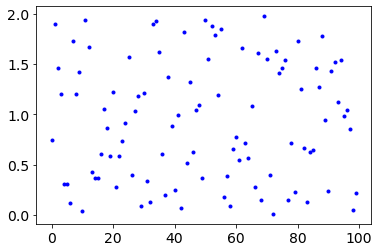

In [4]:
plt.plot(X, ".b")

In [5]:
X.shape, X.ndim

((100, 1), 2)

In [6]:
len(X[:] <= 1)

100

In [7]:
# y = 4 + 3X + random noise
y = 4 + 3 * X + np.random.randn(100, 1)

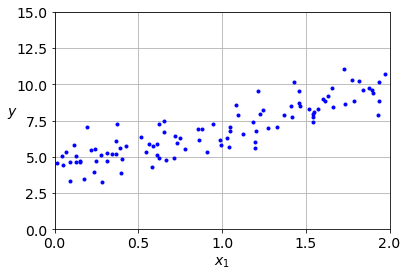

In [8]:
plt.plot(X, y, "b.")
plt.axis([0, 2, 0, 15])
plt.xlabel("$x_1$")
plt.ylabel("$y$", rotation=0)
plt.grid(True)
plt.show()

In [9]:
# We will include x0 as 1
X_b = np.c_[np.ones((100, 1)), X]

In [10]:
X_b.shape, X_b.ndim

((100, 2), 2)

In [11]:
# X_b is now having value for x0 and x1
X_b[:3]

array([[1.        , 0.74908024],
       [1.        , 1.90142861],
       [1.        , 1.46398788]])

### Normal Equation

In [12]:
# we will use normal equation to find out the best parameters, theta_ best
# normal equation = inv(X.T.X).X.T.y
theta_best = np.linalg.inv(X_b.T.dot(X_b)).dot(X_b.T.dot(y))

In [13]:
# as we can see the thetas are captured quite correctly, 4/ 3.9 and 3/ 3.14
theta_best

array([[4.21509616],
       [2.77011339]])

In [14]:
# let us take a new data where m is 3
X_new = np.random.rand(3, 1)

In [15]:
X_new.shape, X_new.ndim

((3, 1), 2)

In [16]:
X_new_b = np.c_[np.ones((3, 1)), X_new]

In [17]:
X_new_b

array([[1.        , 0.7948113 ],
       [1.        , 0.50263709],
       [1.        , 0.57690388]])

In [18]:
# let us now predict
y_predict = X_new_b.dot(theta_best)

In [19]:
y_predict

array([[6.41681359],
       [5.6074579 ],
       [5.81318533]])

<function matplotlib.pyplot.show(close=None, block=None)>

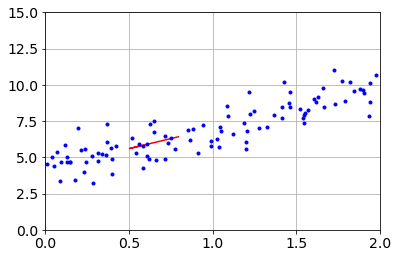

In [20]:
# let us plot it
plt.plot(X_new, y_predict, "r-")
# plt.plot(X_new, y_predict, "s")
plt.plot(X, y, 'b.')
plt.axis([0, 2, 0, 15])
plt.grid(True)
plt.show

In [21]:
# let us make X 0 and 2
X_edge = np.array([[0], [2]])

In [22]:
X_edge_b = np.c_[np.ones((2, 1)), X_edge]

In [23]:
y_predict_edge = X_edge_b.dot(theta_best)

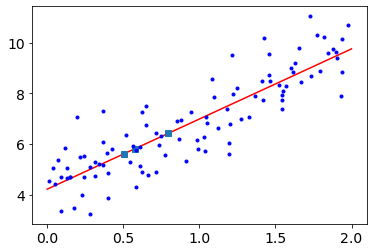

In [24]:
plt.plot(X_edge, y_predict_edge, "r-")
plt.plot(X_new, y_predict, "s")
plt.plot(X, y, ".b")

### Scikit-learn Linear Regression

In [25]:
from sklearn.linear_model import LinearRegression

In [26]:
lin_reg = LinearRegression()

In [27]:
lin_reg.fit(X, y)

LinearRegression()

In [28]:
lin_reg.predict(X_new), y_predict

(array([[6.41681359],
        [5.6074579 ],
        [5.81318533]]),
 array([[6.41681359],
        [5.6074579 ],
        [5.81318533]]))

As we can see the result is almost equal. However, scikit learn linear regression is based on SVD

In [29]:
lin_reg.intercept_, lin_reg.coef_

(array([4.21509616]), array([[2.77011339]]))

The intercept term and the coef are equal

### Now we will experiment with Gradient Descent to minimize the cost function

Gradient Descent is optimization algorithm:
1) Batch Gradient Descent
2) Stochastic Gradient Descent
3) Mini- bathc Gradient Descent


In [30]:
# We will implement the gradient descent step:
# we first calculate the gradient vector which point uphill. So, we update the theta in the
# opposite direction
# theta(next step) = theta - learning rate * gradient vector

In [31]:
eta = 0.1 # learning rate
n_iterations = 1000
m = 100 # number of samples

In [32]:
np.random.seed(42)
theta = np.random.randn(2,1) # random initialization of theta

In [33]:
theta

array([[ 0.49671415],
       [-0.1382643 ]])

In [34]:
for iteration in range(n_iterations):
    gradients = 2/m * X_b.T.dot(X_b.dot(theta) -y)
    theta = theta - eta * gradients

In [35]:
theta

array([[4.21509616],
       [2.77011339]])

In [36]:
theta_path_bgd = []

def plot_gradient_descent(theta, eta, theta_path=None):
    m = len(X_b)
    plt.plot(X, y, "b.")
    n_iterations = 1000
    for iteration in range(n_iterations):
        if iteration < 10:
            y_predict_edge = X_edge_b.dot(theta)
            style = "b-" if iteration > 0 else "r--"
            plt.plot(X_edge, y_predict_edge, style)
        gradients = 2/m * X_b.T.dot(X_b.dot(theta) - y)
        theta = theta - eta * gradients
        if theta_path is not None:
            theta_path.append(theta)
    plt.xlabel("$x_1$", fontsize=18)
    plt.axis([0, 2, 0, 15])
    plt.title(r"$\eta = {}$".format(eta), fontsize=16)

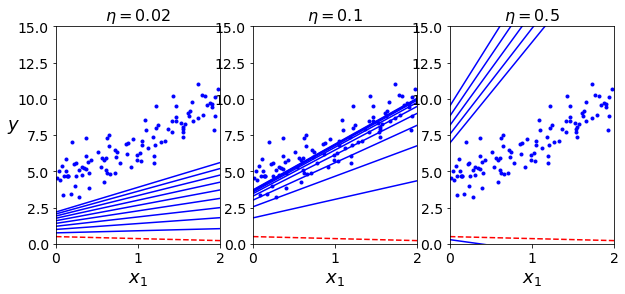

In [37]:
np.random.seed(42)
theta = np.random.randn(2,1)  # random initialization

plt.figure(figsize=(10,4))
plt.subplot(131); plot_gradient_descent(theta, eta=0.02)
plt.ylabel("$y$", rotation=0, fontsize=18)
plt.subplot(132); plot_gradient_descent(theta, eta=0.1, theta_path=theta_path_bgd)
plt.subplot(133); plot_gradient_descent(theta, eta=0.5)

# save_fig("gradient_descent_plot")
plt.show()

### Stochastic Gradient Descent

In [38]:
# Learning Scheduel: The function that determine the learning rate at each iteration.
# With SGD, the learning rate is keep large at the beginning and gradually lowering the 
# learning rate.

In [39]:
np.random.seed(42)
n_epochs = 50
t0, t1 = 5, 50

theta = np.random.randn(2, 1) # random initialization
print(theta)

# The function that determines the learning rate at each iteration is called Learning Schedule
def learning_schedule(t):
    return t0 / (t + t1)

for epoch in range(n_epochs):
    for i in range(m):
        random_index = np.random.randint(m)
        xi = X_b[random_index:random_index+1]
        yi = y[random_index:random_index+1]
        gradients = 2 * xi.T.dot(xi.dot(theta) - yi)
        eta = learning_schedule(epoch * m + i)
#         print(eta)
        theta = theta - eta * gradients
        
print(theta)    
        
        

[[ 0.49671415]
 [-0.1382643 ]]
[[4.21076011]
 [2.74856079]]


In [40]:
theta

array([[4.21076011],
       [2.74856079]])

### Using Scikit Learn Stochastic Gradient Descent

In [41]:
from sklearn.linear_model import SGDRegressor

In [42]:
sgd_reg = SGDRegressor(max_iter=1000, tol=1e-3, penalty=None, eta0=0.1)

In [43]:
sgd_reg.fit(X, y.ravel())

SGDRegressor(eta0=0.1, penalty=None)

In [44]:
sgd_reg.intercept_, sgd_reg.coef_

(array([4.23868557]), array([2.82181634]))

### Mini-batch GD

### Polynomial Regression

In [45]:
# Let's generate nonlinear data
np.random.seed(42)
m = 100
X = 6 * np.random.rand(m, 1) - 3

In [46]:
X[:4]

array([[-0.75275929],
       [ 2.70428584],
       [ 1.39196365],
       [ 0.59195091]])

In [47]:
y = 0.5 * X**2 + X + 2 + np.random.randn(m, 1)

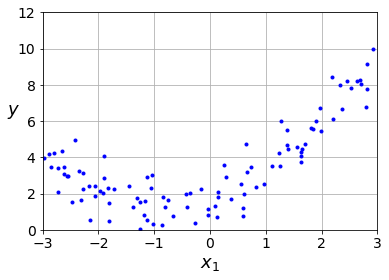

In [48]:
plt.plot(X, y, "b.")
plt.axis([-3, 3, 0, 12])
plt.xlabel("$x_1$", fontsize=18)
plt.ylabel("$y$", rotation=0, fontsize=18)
plt.grid(True)

In [49]:
# Now, using the polynomial features from scikit-learn
from sklearn.preprocessing import PolynomialFeatures

poly_features = PolynomialFeatures(degree=2, include_bias=False)

X_poly = poly_features.fit_transform(X)


In [50]:
X[1], X_poly[1]

(array([2.70428584]), array([2.70428584, 7.3131619 ]))

In [51]:
lin_reg = LinearRegression()
lin_reg.fit(X_poly, y)
lin_reg.intercept_, lin_reg.coef_

(array([1.78134581]), array([[0.93366893, 0.56456263]]))

In [52]:
X_new = np.linspace(-3, 3, 100).reshape(100,1)

In [53]:
X_new_poly = poly_features.transform(X_new)
y_new = lin_reg.predict(X_new_poly)

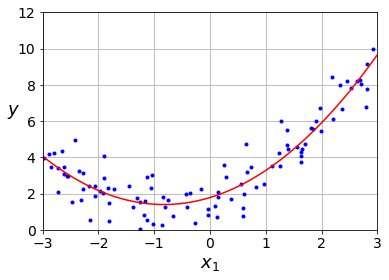

In [54]:
plt.plot(X, y, "b.")
plt.plot(X_new, y_new, 'r-')
plt.axis([-3, 3, 0, 12])
plt.xlabel("$x_1$", fontsize=18)
plt.ylabel("$y$", rotation=0, fontsize=18)
plt.grid(True)

#### Testing with Polynomial Degree of 300

In [55]:
poly_300 = PolynomialFeatures(degree=300, include_bias=False)

In [56]:
X_poly_300 = poly_300.fit_transform(X)

In [57]:
len(X_poly_300[0])

300

In [58]:
lin_reg_poly = LinearRegression()

In [59]:
lin_reg_poly.fit(X_poly_300, y)

LinearRegression()

In [60]:
lin_reg_poly.intercept_

array([3.17012815])

In [61]:
X_new_1 = np.linspace(-3, 3, 100).reshape(100, 1)

In [62]:
X_new_1.shape

(100, 1)

In [63]:
X_new_1_poly = poly_300.transform(X_new_1)

In [64]:
len(X_new_1_poly[0])

300

In [65]:
y_new_1 = lin_reg_poly.predict(X_new_1_poly)

In [66]:
y_new_1[:4]

array([[-2.39797447e+09],
       [ 1.26401869e+06],
       [ 9.30663357e+01],
       [ 8.45788992e+00]])

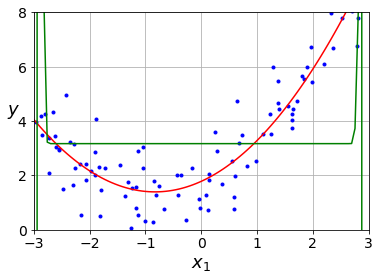

In [67]:
plt.plot(X, y, "b.")
plt.plot(X_new, y_new, 'r-')
plt.plot(X_new_1, y_new_1, 'g-')
plt.axis([-3, 3, 0, 8])
plt.xlabel("$x_1$", fontsize=18)
plt.ylabel("$y$", rotation=0, fontsize=18)
plt.grid(True)

### Pipeline for Comparison

In [68]:
np.random.seed(42)
m = 100
X = 6 * np.random.rand(m, 1) - 3

In [69]:
y = 0.5 * X**2 + X + 2 + np.random.randn(m, 1)

In [70]:
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline

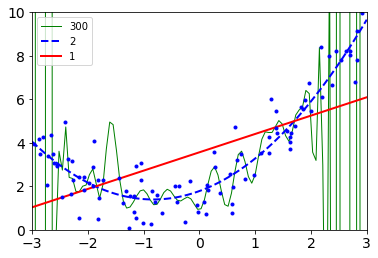

In [71]:
for style, width, degree in (('g-', 1, 300), ("b--", 2, 2), ("r-", 2, 1)):
    polybig_features = PolynomialFeatures(degree=degree, include_bias=False)
    std_scaler = StandardScaler()
    lin_reg = LinearRegression()
    polynomial_regression = Pipeline([
        ('polybig_features', polybig_features),
        ('std_scaler', std_scaler),
        ('lin_reg', lin_reg)
    ])
    
    polynomial_regression.fit(X, y)
    y_newbig = polynomial_regression.predict(X_new)
    plt.plot(X_new, y_newbig, style, label=str(degree), linewidth=width)
    
plt.plot(X, y, "b.", linewidth=3)
plt.axis([-3, 3, 0, 10])
plt.legend(loc="upper left")

#### Learning Curve

Learning curve are plots of the model performance on the training set and validation set as a function of the training set size. X axis size of the training set and Y axis is error

In [72]:
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import train_test_split

In [73]:
def plot_learning_curves(model, X, y):
    X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.2)
    train_errors, val_errors = [], []
    for m in range(1, len(X_train)):
        model.fit(X_train[:m], y_train[:m])
        y_train_predict = model.predict(X_train[:m])
        y_val_predict = model.predict(X_val)
        train_errors.append(mean_squared_error(y_train[:m], y_train_predict))
        val_errors.append(mean_squared_error(y_val, y_val_predict))
    plt.plot(np.sqrt(train_errors), "r-+", linewidth=2, label="train")
    plt.plot(np.sqrt(val_errors), "b-", linewidth=2, label="val")
    plt.xlabel("Training Set Size")
    plt.ylabel("RMSE")
    plt.grid(True)
    plt.legend(loc="upper right") 
        

In [74]:
lin_reg= LinearRegression()

(0.0, 80.0, 0.0, 3.0)

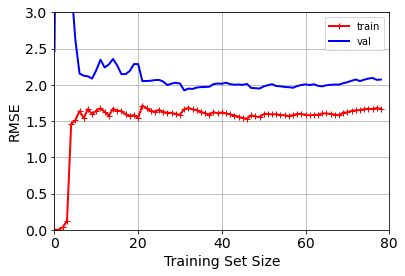

In [75]:
plot_learning_curves(lin_reg, X, y)
plt.axis([0, 80, 0, 3])


In [76]:
# let's look at a polynomial regression of degree 10
poly_regression = Pipeline([
    ('poly_features', PolynomialFeatures(degree=10, include_bias=False)),
    ("lin_reg", LinearRegression())
])

(0.0, 80.0, 0.0, 3.0)

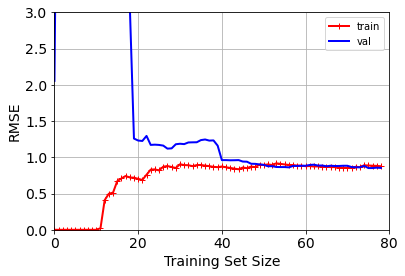

In [77]:
plot_learning_curves(poly_regression, X, y)
plt.axis([0, 80, 0, 3])

#### Early Stopping

In [78]:
from copy import deepcopy
from sklearn.base import clone

In [79]:
np.random.seed(42)
m = 100
X = 6 * np.random.rand(m, 1) -3
y = 2 + X + 0.5 * X**2 + np.random.randn(m, 1)

X_train, X_val, y_train, y_val = train_test_split(X[:50], y[:50].ravel(), test_size=0.5, random_state=10)


In [80]:
poly_scaler = Pipeline([
    ("poly_features", PolynomialFeatures(degree=90, include_bias=False)),
    ("std_scaler", StandardScaler())
])

In [81]:
X_train_poly_scaled = poly_scaler.fit_transform(X_train)
X_val_poly_scaled = poly_scaler.fit_transform(X_val)



In [82]:
sgd_reg = SGDRegressor(max_iter=1, tol=-np.infty, warm_start=True,
                      penalty=None, learning_rate="constant", eta0=0.0005, random_state=42)

In [83]:
minimum_val_error = float("inf")
best_epoch = None
best_model = None

for epoch in range(1000):
    sgd_reg.fit(X_train_poly_scaled, y_train) 
    y_val_predict = sgd_reg.predict(X_val_poly_scaled)
    val_error = mean_squared_error(y_val, y_val_predict)
    if val_error < minimum_val_error:
        minimum_val_error = val_error
        best_epoch = epoch
        best_model = deepcopy(sgd_reg)

In [84]:
best_model.intercept_

array([3.00007491])

In [85]:
y[:5], y[:5].ravel()

(array([[1.61761105],
        [8.06185944],
        [4.45250583],
        [0.77958493],
        [1.84625712]]),
 array([1.61761105, 8.06185944, 4.45250583, 0.77958493, 1.84625712]))

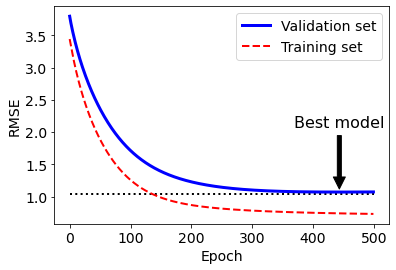

In [86]:
sgd_reg = SGDRegressor(max_iter=1, tol=-np.infty, warm_start=True,
                       penalty=None, learning_rate="constant", eta0=0.0005, random_state=42)

n_epochs = 500
train_errors, val_errors = [], []
for epoch in range(n_epochs):
    sgd_reg.fit(X_train_poly_scaled, y_train)
    y_train_predict = sgd_reg.predict(X_train_poly_scaled)
    y_val_predict = sgd_reg.predict(X_val_poly_scaled)
    train_errors.append(mean_squared_error(y_train, y_train_predict))
    val_errors.append(mean_squared_error(y_val, y_val_predict))

best_epoch = np.argmin(val_errors)
best_val_rmse = np.sqrt(val_errors[best_epoch])

plt.annotate('Best model',
             xy=(best_epoch, best_val_rmse),
             xytext=(best_epoch, best_val_rmse + 1),
             ha="center",
             arrowprops=dict(facecolor='black', shrink=0.05),
             fontsize=16,
            )

best_val_rmse -= 0.03  # just to make the graph look better
plt.plot([0, n_epochs], [best_val_rmse, best_val_rmse], "k:", linewidth=2)
plt.plot(np.sqrt(val_errors), "b-", linewidth=3, label="Validation set")
plt.plot(np.sqrt(train_errors), "r--", linewidth=2, label="Training set")
plt.legend(loc="upper right", fontsize=14)
plt.xlabel("Epoch", fontsize=14)
plt.ylabel("RMSE", fontsize=14)
plt.show()

#### Sigmoid Function Study

In [87]:
def sigmoid_func(t):
    return 1 / (1 + np.exp(-t))

In [88]:
for t in (-8, -1, -.1, 0, .1, 1, 8):
    print("For t value {}: {} ".format((t), sigmoid_func(t)))

For t value -8: 0.0003353501304664781 
For t value -1: 0.2689414213699951 
For t value -0.1: 0.47502081252106 
For t value 0: 0.5 
For t value 0.1: 0.52497918747894 
For t value 1: 0.7310585786300049 
For t value 8: 0.9996646498695336 


In [89]:
t = np.linspace(-10, 10, 100)
results = []
for i in t:
    result = sigmoid_func(i)
    results.append(result)
    

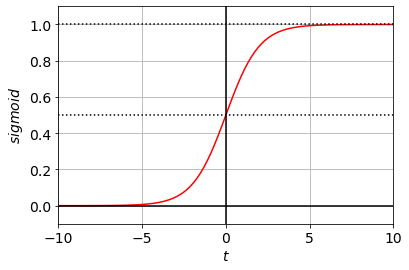

In [90]:
plt.plot(t, results, "r-")
plt.plot([-10, 10], [0, 0], "k-")
plt.plot([-10, 10], [0.5, 0.5], "k:")
plt.plot([-10, 10], [1, 1], "k:")
plt.plot([0, 0], [-.1, 1.1], "k-")
plt.axis([-10, 10, -0.1, 1.1])
plt.xlabel("$t$", fontsize=14)
plt.ylabel("$sigmoid$", rotation=90, fontsize=14)
plt.grid(True)

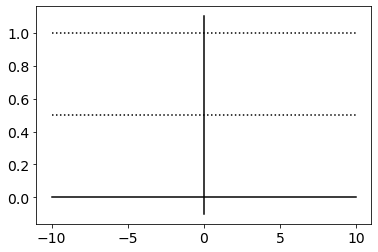

In [91]:
plt.plot([-10, 10], [0, 0], "k-")
plt.plot([-10, 10], [0.5, 0.5], "k:")
plt.plot([-10, 10], [1, 1], "k:")
plt.plot([0, 0], [-.1, 1.1], "k-")

## Logistic Regression

In [92]:
from sklearn import datasets

In [93]:
iris = datasets.load_iris()

In [94]:
type(iris)

sklearn.utils.Bunch

In [95]:
iris.keys()

dict_keys(['data', 'target', 'frame', 'target_names', 'DESCR', 'feature_names', 'filename'])

In [96]:
iris['feature_names']

['sepal length (cm)',
 'sepal width (cm)',
 'petal length (cm)',
 'petal width (cm)']

In [97]:
print(iris['DESCR'])

.. _iris_dataset:

Iris plants dataset
--------------------

**Data Set Characteristics:**

    :Number of Instances: 150 (50 in each of three classes)
    :Number of Attributes: 4 numeric, predictive attributes and the class
    :Attribute Information:
        - sepal length in cm
        - sepal width in cm
        - petal length in cm
        - petal width in cm
        - class:
                - Iris-Setosa
                - Iris-Versicolour
                - Iris-Virginica
                
    :Summary Statistics:

    ============== ==== ==== ======= ===== ====================
                    Min  Max   Mean    SD   Class Correlation
    ============== ==== ==== ======= ===== ====================
    sepal length:   4.3  7.9   5.84   0.83    0.7826
    sepal width:    2.0  4.4   3.05   0.43   -0.4194
    petal length:   1.0  6.9   3.76   1.76    0.9490  (high!)
    petal width:    0.1  2.5   1.20   0.76    0.9565  (high!)
    ============== ==== ==== ======= ===== ===========

In [98]:
# Make a classifier based on petal width
iris['feature_names']

['sepal length (cm)',
 'sepal width (cm)',
 'petal length (cm)',
 'petal width (cm)']

In [99]:
X = iris['data'][:, 3:] # petal width

In [100]:
# for classifier for Iris Virginica
iris['target_names']

array(['setosa', 'versicolor', 'virginica'], dtype='<U10')

In [101]:
y = (iris['target'] == 2)

In [102]:
y = y.astype(np.int) # converting boolean as int; 1 for virginica and 0 for others
y

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1])

In [103]:
from sklearn.linear_model import LogisticRegression


In [104]:
log_reg = LogisticRegression()

In [105]:
log_reg.fit(X, y)

LogisticRegression()

In [106]:
X_new = np.linspace(0, 3, 1000).reshape(-1,1)
X_new.shape

(1000, 1)

In [107]:
y_proba = log_reg.predict_proba(X_new)

In [108]:
y_proba[0]

array([9.99250016e-01, 7.49984089e-04])

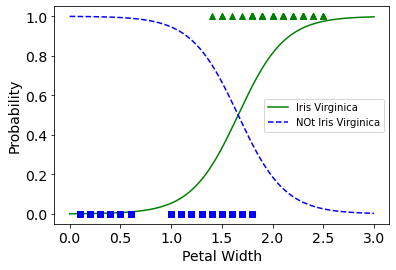

In [109]:
plt.plot(X_new, y_proba[:, 1], "g-", label="Iris Virginica")
plt.plot(X_new, y_proba[:, 0], "b--", label="NOt Iris Virginica")
plt.plot(X[y==0], y[y==0], "bs") # where not virginica
plt.plot(X[y==1], y[y==1], "g^") # where virginica
plt.xlabel("Petal Width")
plt.ylabel("Probability")
plt.legend()


In [110]:
decision_boundary = X_new[y_proba[:,1] >= 0.5][0]
decision_boundary

array([1.66066066])

In [111]:
-np.log2(1/8)

3.0

In [112]:
# defining a cross entropy calculator
def cal_cross_entropy_loss(actual, predicted):
    return - actual * np.log2(predicted)

In [113]:
my_list = [.1, .25, .5, .75, 1]
loss = [] 
for i in my_list:
    loss_each = cal_cross_entropy_loss(1, i)
    loss.append(loss_each)
    print(loss_each)

3.321928094887362
2.0
1.0
0.4150374992788438
-0.0


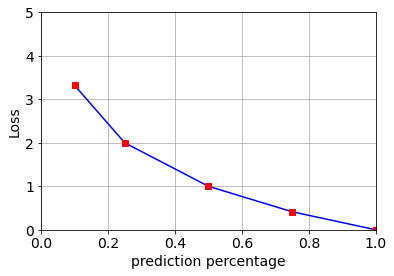

In [122]:
plt.plot(my_list, loss, "b-")
plt.plot(my_list, loss, "rs")
plt.xlabel("prediction percentage")
plt.ylabel("Loss")
plt.axis([0, 1, 0, 5])
plt.grid()

In [115]:
loss

[3.321928094887362, 2.0, 1.0, 0.4150374992788438, -0.0]